# **Random Imputation**

Missing values are filled with random numbers that are already present in the data set.

This technique can be applied on both numerical and categorical data.

Data distribution remains intact befor and after imputation.

This is much better when dealing with linear algorithms.

Done in pandas.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


Now we will fill the age columns missing values randomly.

In [ ]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
x_train.sample()

,Age,Fare
476,34.0,21.0


In [ ]:
x_train['Age_imputed'] = x_train['Age']
x_test['Age_imputed'] = x_test['Age']

In [ ]:
x_train.sample()

,Age,Fare,Age_imputed
766,NaN,39.6,NaN


In [ ]:
x_train['Age_imputed'][x_train['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
x_test['Age_imputed'][x_test['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

In [ ]:
x_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,19.0
493,71.0,49.5042,71.0
527,NaN,221.7792,27.0


In [ ]:
x_train.isnull().sum()

,0
Age,148
Fare,0
Age_imputed,0


<ipython-input-22-931e959215d3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],label='Original',hist=False)
<ipython-input-22-931e959215d3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age_imputed'],label='Imputed',hist=False)


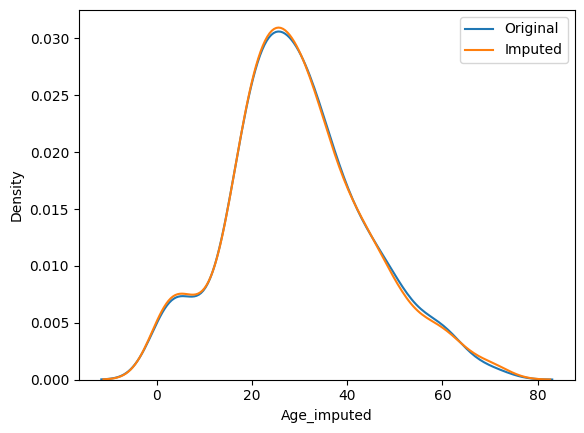

In [ ]:
sns.distplot(x_train['Age'],label='Original',hist=False)
sns.distplot(x_train['Age_imputed'],label='Imputed',hist=False)
plt.legend()
plt.show()

Distribution is similar

In [ ]:
print('Original variable variance : ',x_train['Age'].var())
print('Imputed variable variance : ',x_train['Age_imputed'].var())

Original variable variance :  204.34951339046142
Imputed variable variance :  208.19316792537808


No major difference in the variance also

**A problem at the production time:**

Say suppose person A has given a fare as 100 and age is not given then ramdonly it is imputed as say 25(age)

now again some person B has entered the fare as 100 but not the age then again the age will be randomly imuted say 40(age)

**This is wrong**

person A

Fare - 100;
Age - 25

then

person B

Fare - 100;
Age - 25 (must be 25 again and not 40)

**To avoid this only :**

In [ ]:
#sampled_value = x_train['Age'].dropna().sample(1, random_state = int(observation['Fare']))

NameError: name 'observation' is not defined

# **Now for categorical data**

In [26]:
data = pd.read_csv('Housing.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [27]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [28]:
data.isnull().sum()

,0
FireplaceQu,690
GarageQual,81
SalePrice,0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FireplaceQu  770 non-null    object
 1   GarageQual   1379 non-null   object
 2   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 34.3+ KB


In [30]:
x = data
y = data['SalePrice']

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [32]:
x_train['GarageQual_imputed'] = x_train['GarageQual']
x_test['GarageQual_imputed'] = x_test['GarageQual']

x_train['FireplaceQu_imputed'] = x_train['FireplaceQu']
x_test['FireplaceQu_imputed'] = x_test['FireplaceQu']

In [33]:
x_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
591,Gd,TA,451950,TA,Gd
147,Gd,TA,222500,TA,Gd
1230,TA,TA,190000,TA,TA
467,Gd,TA,146500,TA,Gd
1110,TA,TA,188000,TA,TA


In [34]:
x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isnull().sum()).values
x_test['GarageQual_imputed'][x_test['GarageQual_imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_test['GarageQual'].isnull().sum()).values

x_train['FireplaceQu_imputed'][x_train['FireplaceQu_imputed'].isnull()] = x_train['FireplaceQu'].dropna().sample(x_train['FireplaceQu'].isnull().sum()).values
x_test['FireplaceQu_imputed'][x_test['FireplaceQu_imputed'].isnull()] = x_train['FireplaceQu'].dropna().sample(x_test['FireplaceQu'].isnull().sum()).values

<ipython-input-34-b7be74142807>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isnull().sum()).values
<ipython-input-34-b7be74142807>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['GarageQual_imputed'][x_test['GarageQual_imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_test['GarageQual'].isnull().sum()).values
<ipython-input-34-b7be74142807>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

<ipython-input-38-1b8d246b9694>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
<ipython-input-38-1b8d246b9694>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu'] =

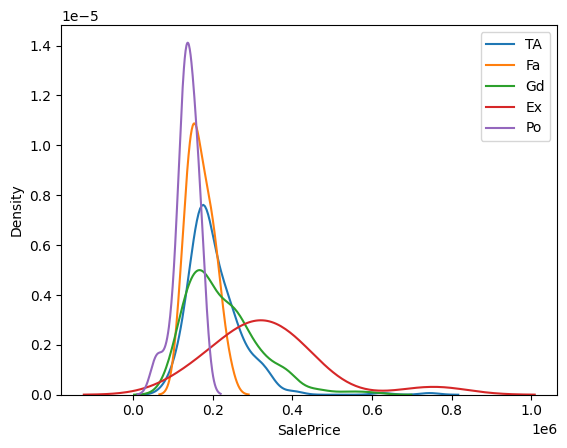

In [38]:
# Now see the changes

for category in x_train['FireplaceQu'].dropna().unique():
  sns.distplot(x_train[x_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.legend()
plt.show()

<ipython-input-39-c4ef2311f946>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
<ipython-input-39-c4ef2311f946>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['Firepla

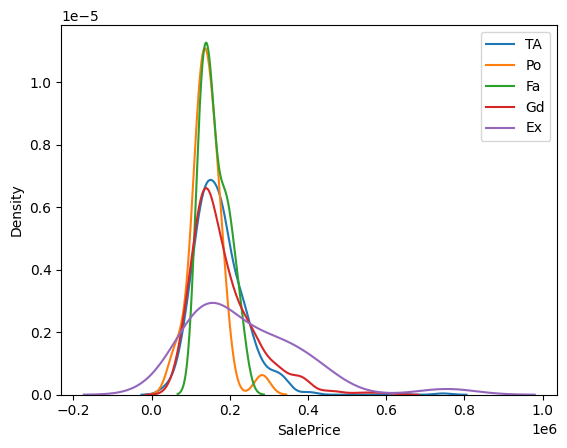

In [39]:
for category in x_train['FireplaceQu_imputed'].dropna().unique():
  sns.distplot(x_train[x_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.legend()
plt.show()

# **Adding a Missing Data Indicator**

In [40]:
data2 = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [41]:
data2.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [42]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [43]:
data2.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [45]:
x = data2.drop(columns=['Survived'])
y = data2['Survived']

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =2)

In [49]:
from sklearn.impute import SimpleImputer
si = SimpleImputer()
x_train_trf = si.fit_transform(x_train)
xtest_trf = si.transform(x_test)

**Befor applying missing data indicator**

In [52]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train_trf,y_train)
y_pred = clf.predict(xtest_trf)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

61.452513966480446

**After applying missing data indicator**

In [54]:
si = SimpleImputer(add_indicator=True)
x_train = si.fit_transform(x_train)
x_test = si.transform(x_test)

In [55]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

63.128491620111724

**2% increase in accuracy after adding the missing data indicator**